In [1]:
import sys
sys.path.append('..')
import nbimport 
nbimport.initialize()

In [2]:
from Stat_18 import *
css_styling()

# Generaliseret kurvetilpasning

# Generalized Curve Fitting

## Linear, ikke-lineær og maksimal sandsynlighed tilpasning 

Vi har lavet funktionerne `lin_fit`, `lsq_fit` og `mle_fit` som alle tilpasser parametrene af en model til data, og som alle returnerer parametre værdierne og kovariansmatrixen.  Vi derfor skrive en funktion som giver os adgang til alle metoderne til kurvetilpasning via én grænseflade.  Vi vil kalde denne funktion `fit` slet og ret.  Hvilken slags kurvetilpasning vi udfører afhænger af hvilke argumenter vi giver 

- Hvis funktionen vi giver er af formen 
 
  $$f(x,p) = \sum_{i=1}^{M} p_if_i(x)\quad,$$ 
  
  givet som sekvensen $(f_1,\ldots,f_M)$, så udfører vi en lineært kurvetilpasning, hvor de efterfølgende
  argumenter er 
  
  - Den uafhængige variabel $x=\{x_1,\ldots,x_N\}$ 
  - Den afhængige variabel $y=\{y_1,\ldots,y_N\}$ 
  - Eventuelt usikkerhederne $\delta_y=\{\delta_{y_1},\ldots,\delta_{y_N}\}$ 
  
- Ellers, hvis antallet af følgende argumenter er mindre en 3, så udfører vi en MLE kurvetilpasning, 
  hvor argumenterne er 
  
  - Observationerne $o=\{o_1,\ldots,o_N\}$ eller bøttergrænser og tællinger 
    $(b,o)=(\{b_1,\ldots,b_{N+1}\},\{o_1,\ldots,o_N\})$ for MLE i bøtter. 
  - Start værdierne $p_0=\{p_1,\ldots,p_M\}$ af parametrene 
  
- Hvis ingen af betingelserne ovenover er opfyldt udfører vi en mindste-kvadrat kurvetilpasning med de 
  efterfølgende argumenter 
  
  - Den uafhængige variabel $x=\{x_1,\ldots,x_N\}$
  - Den afhængige variabel $y=\{y_1,\ldots,y_N\}$ 
  - Start værdierne $p_0=\{p_1,\ldots,p_M\}$ af parametrene 
  - Eventuelt usikkerhederne $\delta_y=\{\delta_{y_1},\ldots,\delta_{y_N}\}$ 
  - Eventuelt usikkerhederne $\delta_x=\{\delta_{x_1},\ldots,\delta_{x_N}\}$ 
  
Andre argumenter eller nølgeordsargumenter vidergives til de underligende funktioner. 

## Linear, non-linear and maximum likelihood fitting

We have created the functions `lin_fit`,`lsq_fit` and `mle_fit` which all fit the parameters of a model to data and all return the parameter values and the covariance matrix. We therefore write a function that gives us access to all the methods of curve fitting via one interface. We will call this function `fit` plain and simple. The kind of curve fitting we perform depends on what arguments we give

- If the function we provide is of the form 

  $$f(x,p) = \sum_{i=1}^{M} p_if_i(x)\quad,$$
  
  given as the $(f_1,\ldots,f_M)$ sequence, we perform a linear curve fitting, where they following arguments are 
  
  - The independent variable $x=\{x_1,\ldots,x_N\}$ 
  - The dependent variable $y=\{y_1,\ldots,y_N\}$ 
  - Optionally, the uncertainties $\delta_y=\{\delta_{y_1},\ldots,\delta_{y_N}\}$ 
  
- Otherwise, if the number of the following arguments is less than 3, then we perform an MLE curve fitting, where the arguments are

  - The observations $o=\{o_1,\ldots,o_N\}$ or the bin boundaries and counts  $(b,o)=(\{b_1,\ldots,b_{N+1}\},\{o_1,\ldots,o_N\})$  for a binned MLE.  
  - The initial values $p_0=\{p_1,\ldots,p_M\}$ of the parameters 
  
- If none of the above conditions are met, we perform a least-squares curve fit with the subsequent arguments are

  - The independent variable $x=\{x_1,\ldots,x_N\}$ 
  - The dependent variable $y=\{y_1,\ldots,y_N\}$ 
  - The initial values $p_0=\{p_1,\ldots,p_M\}$ of the parameters 
  - Optionally, the uncertainties $\delta_y=\{\delta_{y_1},\ldots,\delta_{y_N}\}$ 
  - Optionally, the uncertainties $\delta_x=\{\delta_{x_1},\ldots,\delta_{x_N}\}$ 

Other arguments or keyword arguments are passed to the underlying functions. 

In [3]:
def fit(f,*args,**kwargs):
    try:
        iter(f)
        return lin_fit(f,*args,**kwargs)
    except TypeError:
        pass 
    except:
        raise
    
    if len(args) < 3:
        return mle_fit(f,*args,**kwargs)
    
    return lsq_fit(f,*args,**kwargs)

Lad os gentage nogle af de kurvetilpasninger vi har udført tidligere.  

Let us repeat some of the fits we have made in the previously. 

Først definerer vi data for det lineære fit. 

Først, we define data for the linear fit.

In [4]:
from numpy import ones_like, arange, array

xlin = arange(0,105,5)
ylin = array([-.849, -.738, -.537, -.354, -.196, -.019, 0.262, 
              0.413, 0.734, 0.882, 1.258, 1.305, 1.541, 1.768, 
              1.935, 2.147, 2.456, 2.676, 2.994, 3.200, 3.318])

flin = [lambda x: ones_like(x), lambda x: x, lambda x: x**2]
plin = lambda x,*p : p[0]+p[1]*x+p[2]*x**2

clin = {'t': '  LIN',
        'f':    flin,
        'args': (xlin,ylin,ones_like(ylin)*0.05), 
        'F':    plin}

Bemærk at vi definere `plin` for at kunne plotte funktionen. 

Dernæst laver vi vores opsætning til den ikke-linear tilpasning. 

Note that we define `plin` in order to plot the function.

Next, we define our setup for the non-linear fit.

In [5]:
from numpy import linspace, pi, sqrt

ylsq = array([  7,   2,   6,  12,  15,  18,  31,  29,  27,  27,  41,  35,
               37,  37,  63,  71, 102,  95, 115, 202, 190, 113,  86,  68,
               74,  79,  75,  79,  68,  62,  69,  81,  79,  85,  87,  68,
               70,  89,  77,  70,  71,  62,  85,  62,  73,  70,  59,  61,
               77,  61,  62,  73,  67,  71,  75,  66,  73,  71,  71,  49])
xlsq = linspace(0,3,len(ylsq),endpoint=False)

flsq = lambda x,a1,a2,a3,a0,gamma,e0: \
    a1+a2*x+a3*x**2+a0*(gamma/(2*pi))/((x-e0)**2+(gamma/2)**2)

clsq = {'t': 'LSQ',
        'f': flsq,
        'args': (xlsq,ylsq,(0,0,0,1000,.1,1),sqrt(ylsq)), 
        'plot': (xlsq,ylsq,sqrt(ylsq)) }

Endelig kan vi lave vores data til MLE tilpasningen. Da vi vil give den logaritmiske PDF definere vi også `pmle` til at tegne vores funktion. 

Finally, we can make our data for the MLE fit. Since we want to give the logarithmic PDF we also define `pmle` to draw our function.

In [6]:
from numpy.random import exponential
from numpy import inf, exp, log 

bmle = linspace(0,3,31)
ymle = exponential(size=100)
ymle = ymle[ymle<3]

hmle = histogram(ymle,bmle,normalize=True)

fmle = lambda t,tau: \
    -(log(tau)+log(1-exp(-3/tau)))-t/tau if tau > 0 else -inf
pmle = lambda t,tau: exp(-t/tau)/(1-exp(-3/tau))

cmle = {'t': 'MLE',
        'f': fmle,
        'args': (ymle,[1]),
        'kwargs': {'logpdf':True},
        'F':    pmle,
        'plot': (hmle[1],hmle[0],hmle[3])}

Vi laver en liste af configurationerne ovenover og udfører tilpasningnerne og tegner. 

We make a list of the configurations above and perform the fit s and plot.

Eksempler på brug af generaliseret `fit` funktion i forskellige tilfælde. 

Examples of using generalized `fit` function in different cases.

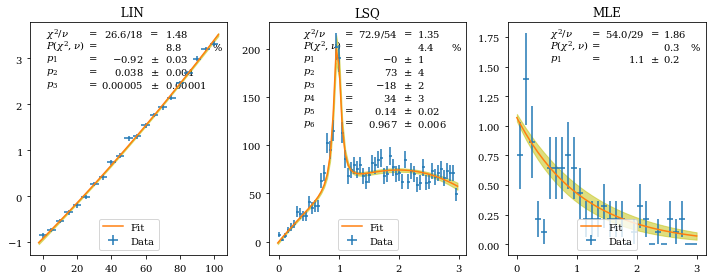

In [7]:
from matplotlib.pyplot import subplots

tests = [clin,clsq,cmle]

fig, ax = subplots(ncols=len(tests),figsize=(10,4))
for t, a in zip(tests,ax):
    p, cov = fit(t['f'],*t['args'],**t.get('kwargs',{}))    
    xy     = t.get('plot',t['args'])
    dx     = (xy[0][1]-xy[0][0])/2
    plot_fit(*xy,
            t.get('F', t['f']), p, cov, axes=a,
            data={'fmt':'none','label':'Data','xerr':dx},
            fit={'label':'Fit'},
            legend={'loc':'lower center'})
    a.set_title(t['t'])
fig.tight_layout()

Bemærk at vi kan ligeledes udfører udvidet maksimal sandsynlighedsestimater (evt. i bøtter) med `fit`. 

Note that we can also perform extended maximum likelihood estimates (possibly in bins) with `fit`.

## Opsummering

Vi har set at vi kan medtage usikkerheder på den uafhængige variabel i en kurvetilpasning.  Hvis vi har data a formen 

$$\{(x_i\pm\delta_{x_i},y_i\pm\delta_{y_i})|i=1,\ldots,N\}\quad,$$ 

skal vi minimerer 

$$\chi^2 = \sum_{i=1}^{N}\frac{(y_i-f(x_i))^2}{\delta_i^2}\quad,$$ 

hvor usikkerhederne $\delta_i$ er givet ved sædvanlig propagation af usikkerheder 

$$\delta_i^2 = \left(\frac{\partial f(x_i)}{\partial x}\right)^2\delta_{x_i}^2 + \delta_{y_i}^2\quad,$$ 

hvor $\delta_i^2$ kaldes den _effektive varians_. Alle andre resultater vedrørende mindste kvadrat metoden kan overføres. 

Vi har også set at det ikke er helt trivielt numerisk at indfører den effektive varians.  Vi har udviklet en metode, og drop-in funktionen `curve_fit` (alias for `lsq_fit`) som bruger en iterativ metode til at kurvetilpasse til et datasæt som ovenover. 

Vi har lavet en fælles adgang til kurvetilpasning via funktionen `fit` som kan udfører lineær og ikke-lineær mindste-kvadart, og maksimal sandsynlighed kurvetilpasninger.  Funktionen returnerer de funde parameter værdier og kovariansmatrixen. 

Desuden har vi set hvorledes vi kan bruge _SymPy_ til nemt at gå fra analytiske (symbolske) udregninger til numeriske beregninger. 

## Summary

We have seen that we can include uncertainties on the independent variable in a curve fit. If we have data of the form

$$\{(x_i\pm\delta_{x_i},y_i\pm\delta_{y_i})|i=1,\ldots,N\}\quad,$$

we must minimize

$$\chi^2 = \sum_{i=1}^{N}\frac{(y_i-f(x_i))^2}{\delta_i^2}\quad,$$

where the uncertainties $\delta_i$ are given by usual propagation of uncertainties

$$\delta_i^2 = \left(\frac{\partial f(x_i)}{\partial x}\right)^2\delta_{x_i}^2 + \delta_{y_i}^2\quad,$$

here, $\delta_i^2$ is called the _effective variance_. All other results regarding the least squares method can be transferred.

We have also seen that introducing the effective variance is not entirely trivial numerically. We have developed a method, and the drop-in function `curve _fit` (alias for `lsq_fit`), which uses an iterative method to fit the curve to a data set such as the one above.

Vi have made the unified fitting interface `fit` which does linear and non-linear least-squares, and maximum likelihood fits of a function to data.  The function will return the found parameter values as well as the covariance matrix. 

Furthermore, we have seen how we can use _SymPy_ to easily move from analytical (symbolic) calculations to numerical calculations.

In [8]:
fit.__doc__=\
"""Unified interface for curve fitting 

This function provides a unified interface for fitting 
functions to data.  Exactly which kind of fit is used depends on 
the data passed.  

- If the function we provide is of the form
 
      f(x,p) = sum_i^M p_i f_i(x)
  
  given as the sequence (f_1,...,f_M), we perform a linear curve fitting, 
  where the following arguments are 
  
  - The independent variable x
  - The dependent variable y 
  - Optionally, the uncertainties delta 
  
- Otherwise, if the number of the following arguments is less than 3, 
  then we perform an MLE curve fitting, where the arguments are
  
  - The observations x, or bin boundaries and counts (b,x)
  - The initial values p_0 of the parameters
  
  For binnned MLE, the bin boundaries must be one larger than the counts.  Counts are 
  either raw counts (density=False), number density (dN/dx, density=1), or normalized 
  number density (1/N dN/dx, density=N - possibly a float)
  
- If none of the above conditions are met, we perform a least-squares curve fit with the
  subsequent arguments
  
  - The independent variable x
  - The dependent variable y 
  - The initial values p_0 of the parameters
  - Optionally, the uncertainties delta_y
  - Optionally, the uncertainties delta_x
  

Other arguments or keyword arguments are passed to the underlying functions. 

Parameters
----------
f : callable or sequence of callables 
    Function to fit to data 
args : tuple 
    Further arguments 
kwargs : dict 
    Keyword arguments
    
See also 
--------
mle_fit, lin_fit, lsq_fit, plot_fit, plot_fit_func, plot_fit_table, chi2nu, residuals 

"""